In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
noday = 365
var = 'bio'
year = '2013'

In [3]:
##Import necessary tools
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
#from matplotlib import reload
from math import radians, cos, sin, asin, sqrt
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)
import sys
import os
#import glob
#import xarray as xr
#from xarray import Dataset as ds
#import time


#import cmocean
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals')
import cluster_fxn as cf
# sys.path.append(respath)
%matplotlib inline
import scipy.io as sio
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
#grid = mf.import_bathy(bath)
#fmask = (grid.fmask[0,0,:,:])
from IPython.display import Image

In [4]:
## Load data and pick cluster number


{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Aug 17 12:36:26 2020', '__version__': '1.0', '__globals__': [], 'clusters': array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  1,  1,  2],
       ...,
       [95, 95, 95, ..., 72, 83, 80],
       [96, 96, 96, ..., 73, 84, 81],
       [97, 97, 97, ..., 74, 85, 82]], dtype=uint8), 'datamat': array([[[5.46412962e-01, 1.86378740e+00, 6.86578240e-01],
        [3.41817892e-01, 9.47798724e-01, 4.09415313e-01],
        [4.16939044e-01, 1.48076298e+00, 5.57694731e-01],
        ...,
        [2.03724641e+00, 4.22962092e+01, 1.68512223e+01],
        [2.27543964e+00, 5.50961091e+01, 2.27541713e+01],
        [1.11389851e+00, 2.48200753e+01, 1.02161158e+01]],

       [[1.04148570e+00, 3.58916703e+00, 1.59503534e+00],
        [1.79113359e+00, 8.42817632e+00, 2.96231959e+00],
        [3.60272236e+00, 2.04855153e+01, 6.84204313e+00],
        ...,
        [1.13368428e+01, 2.30280148e

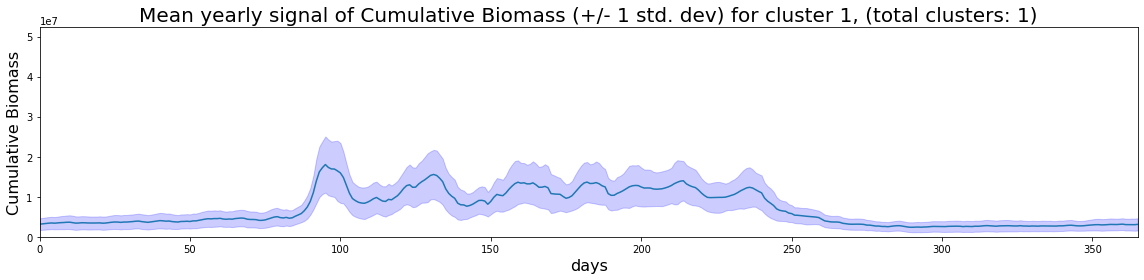

2
2
10


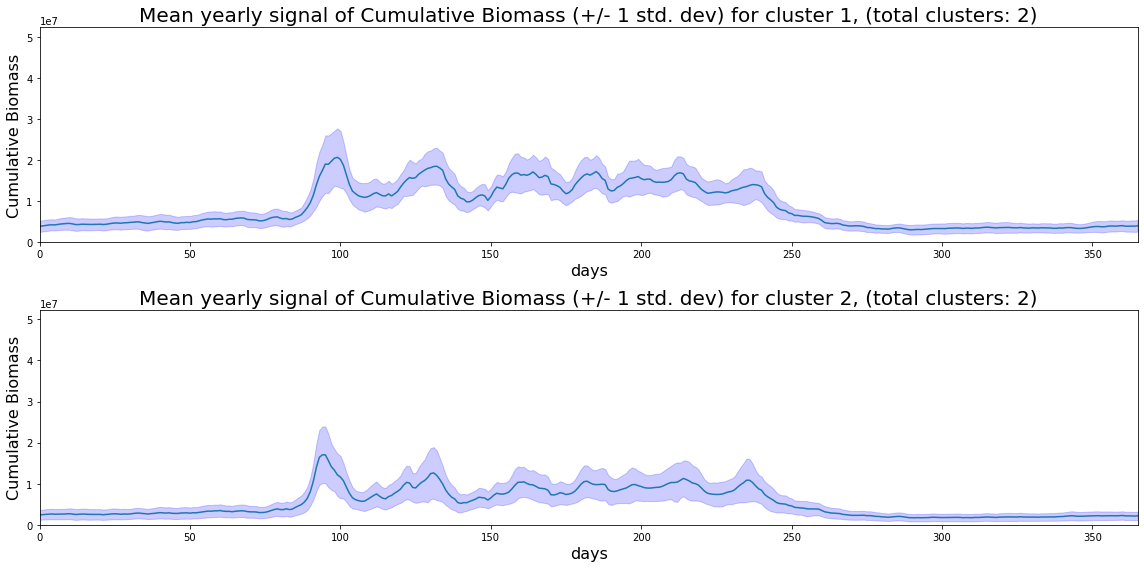

3
3
10


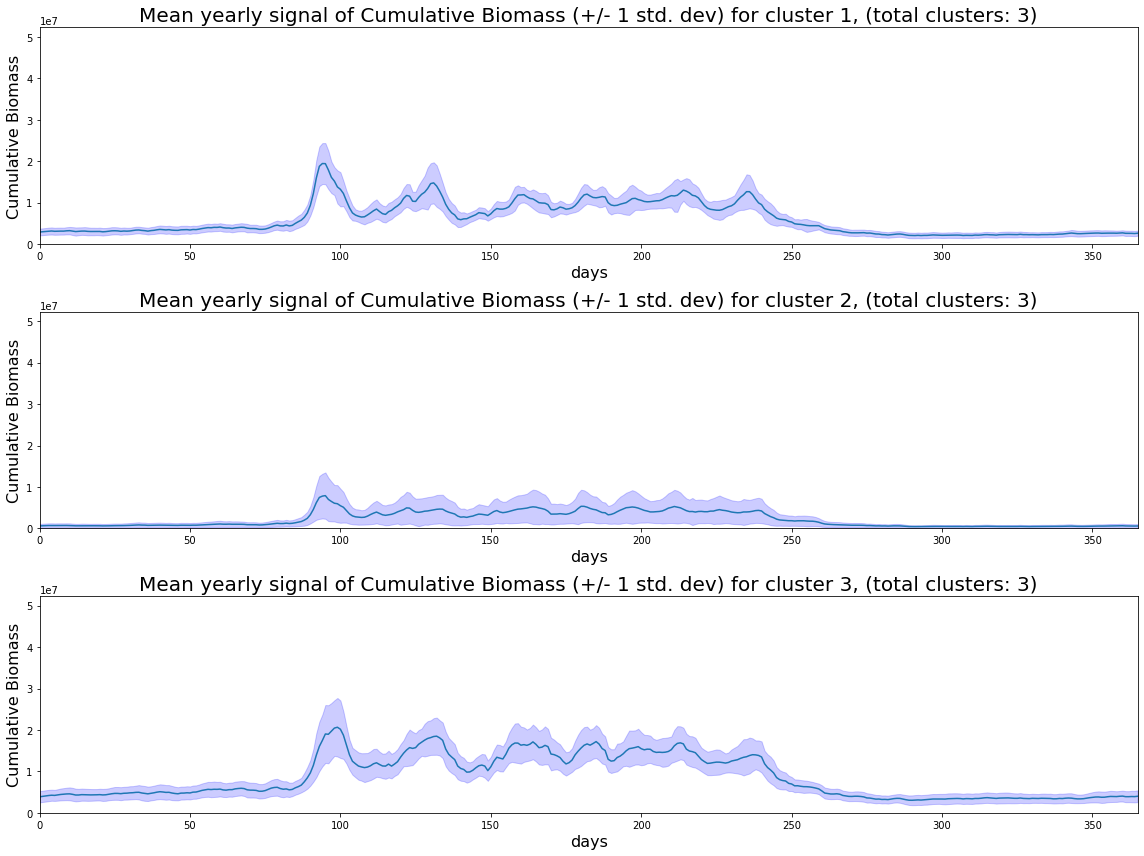

4
4
10


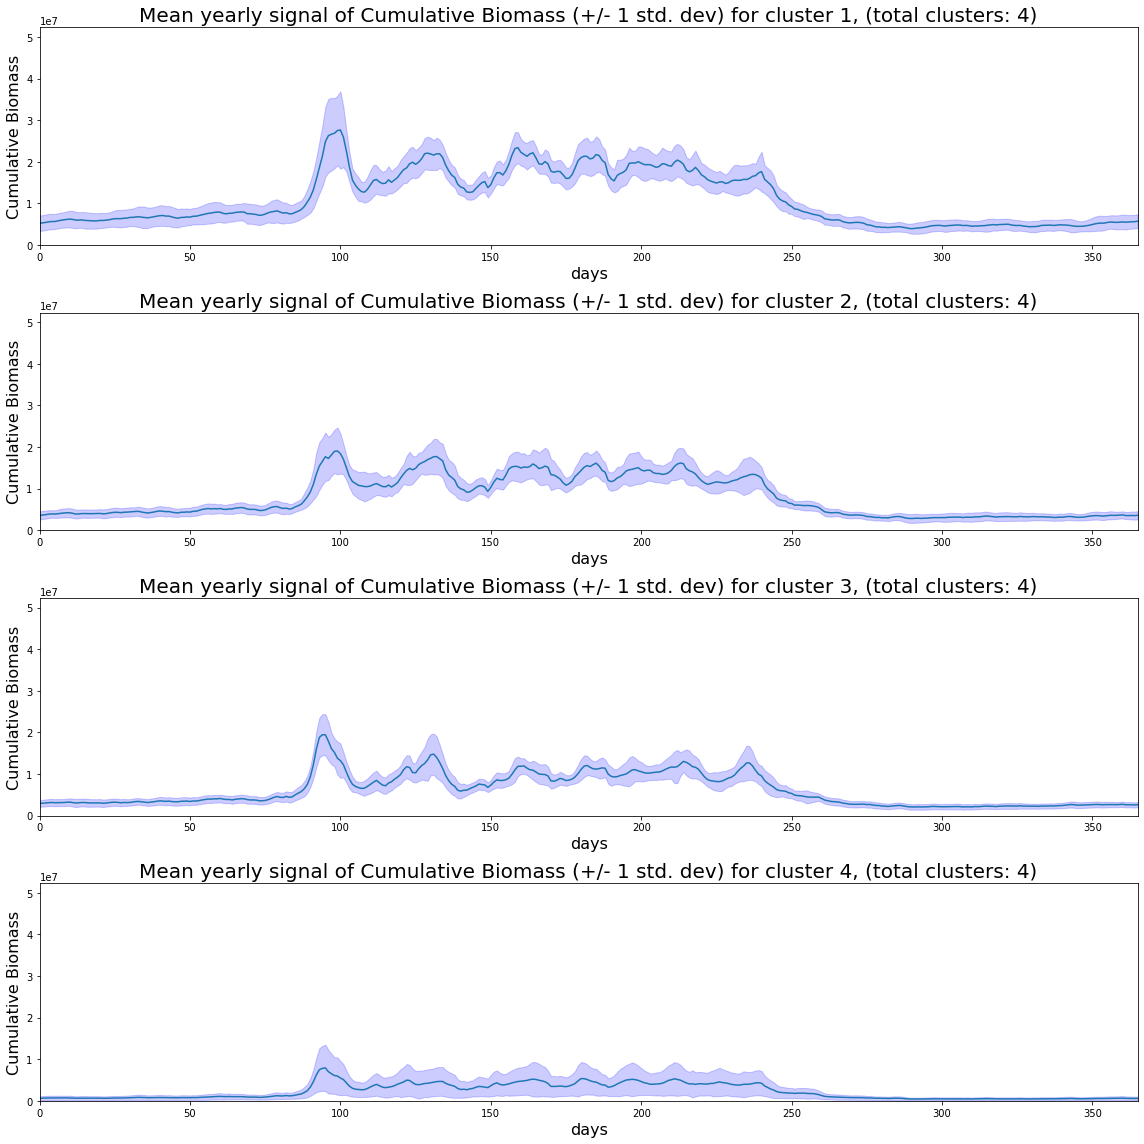

5
5
10


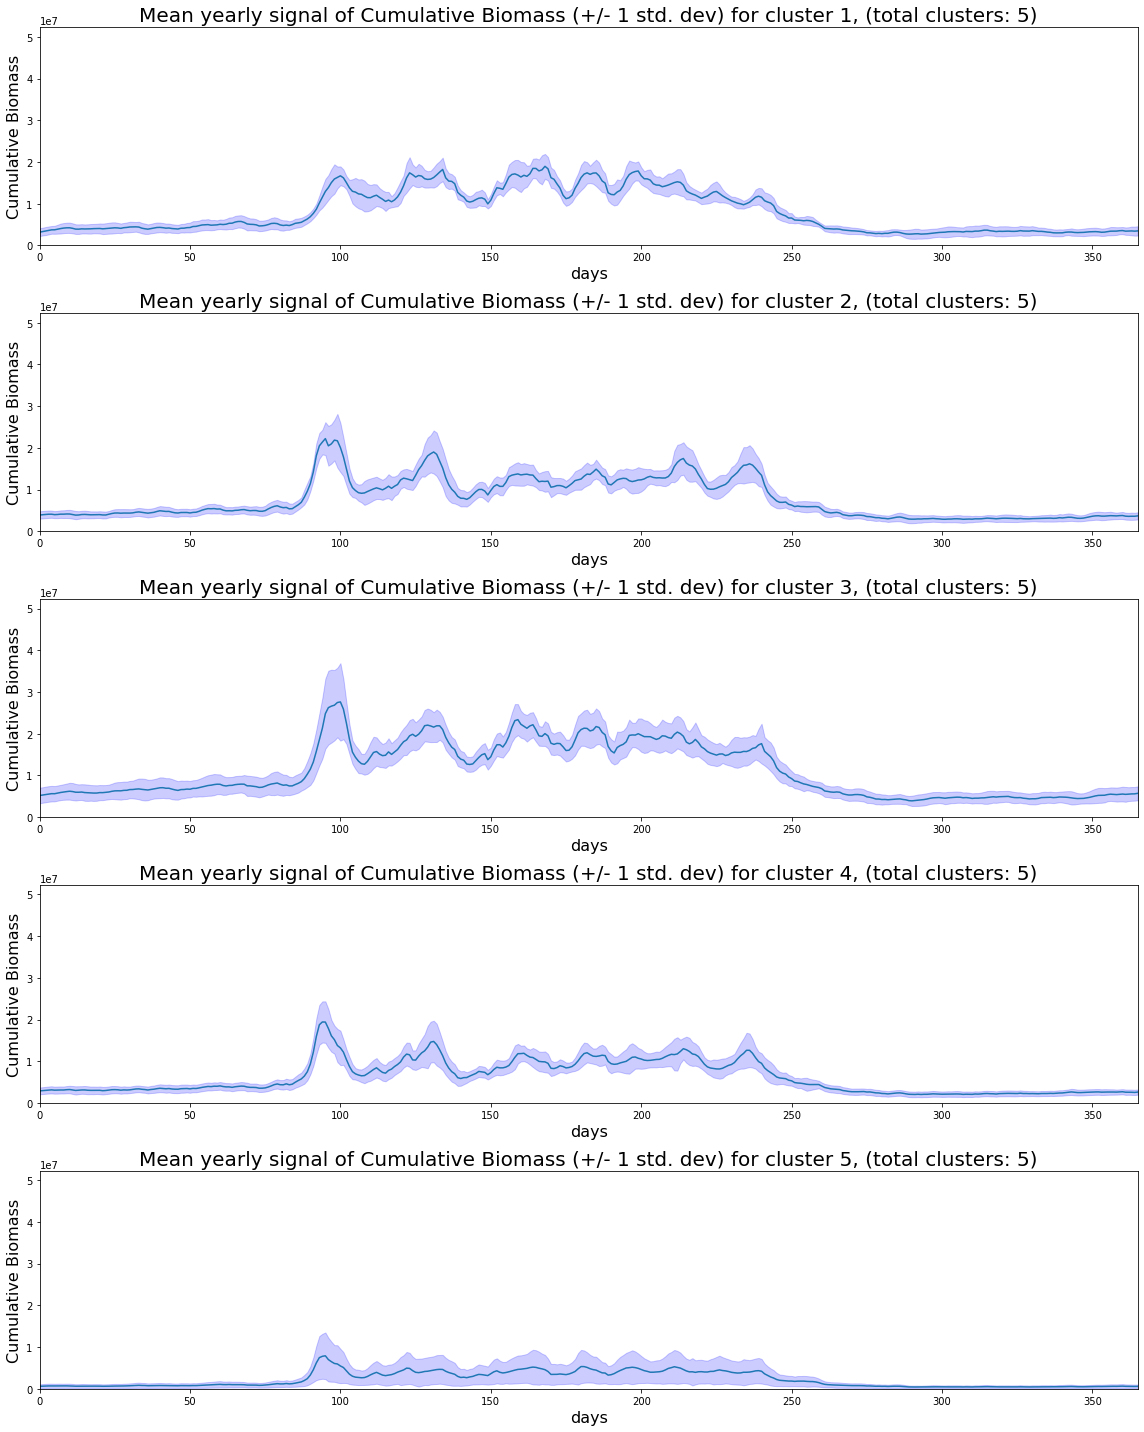

6
6
10


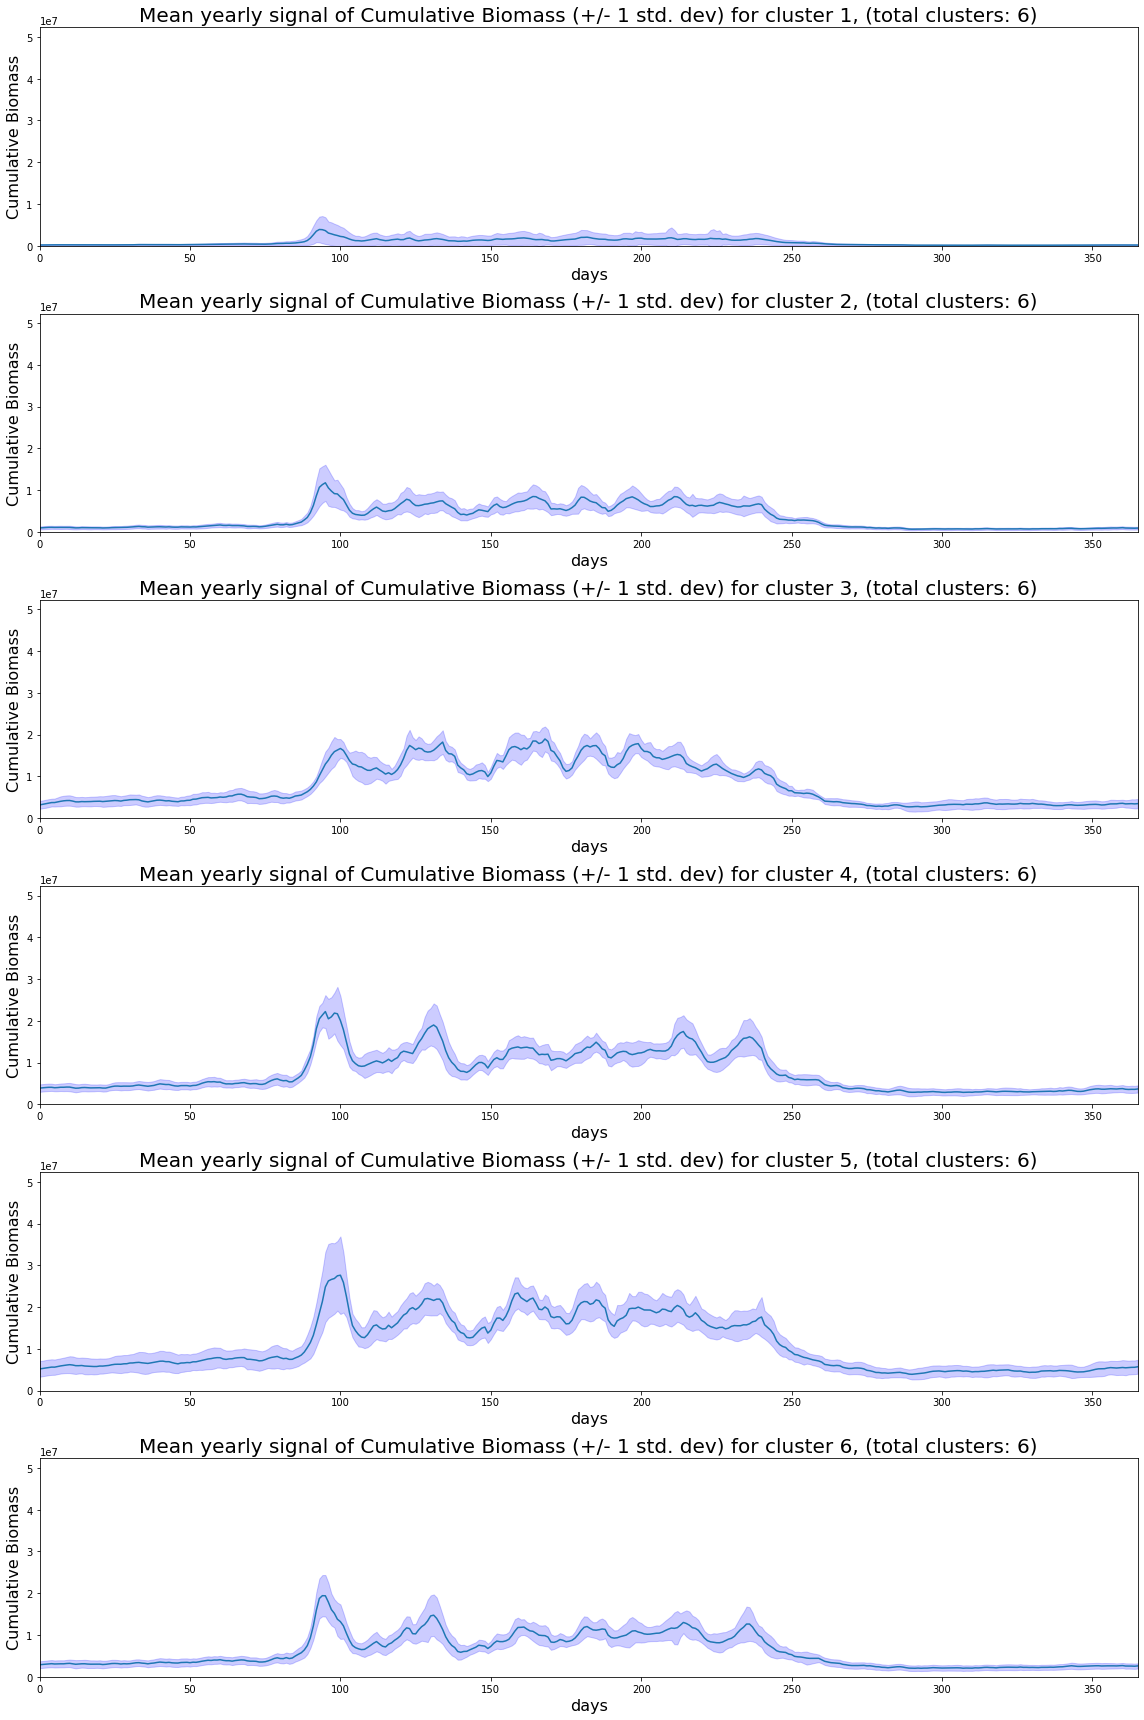

7
7
10


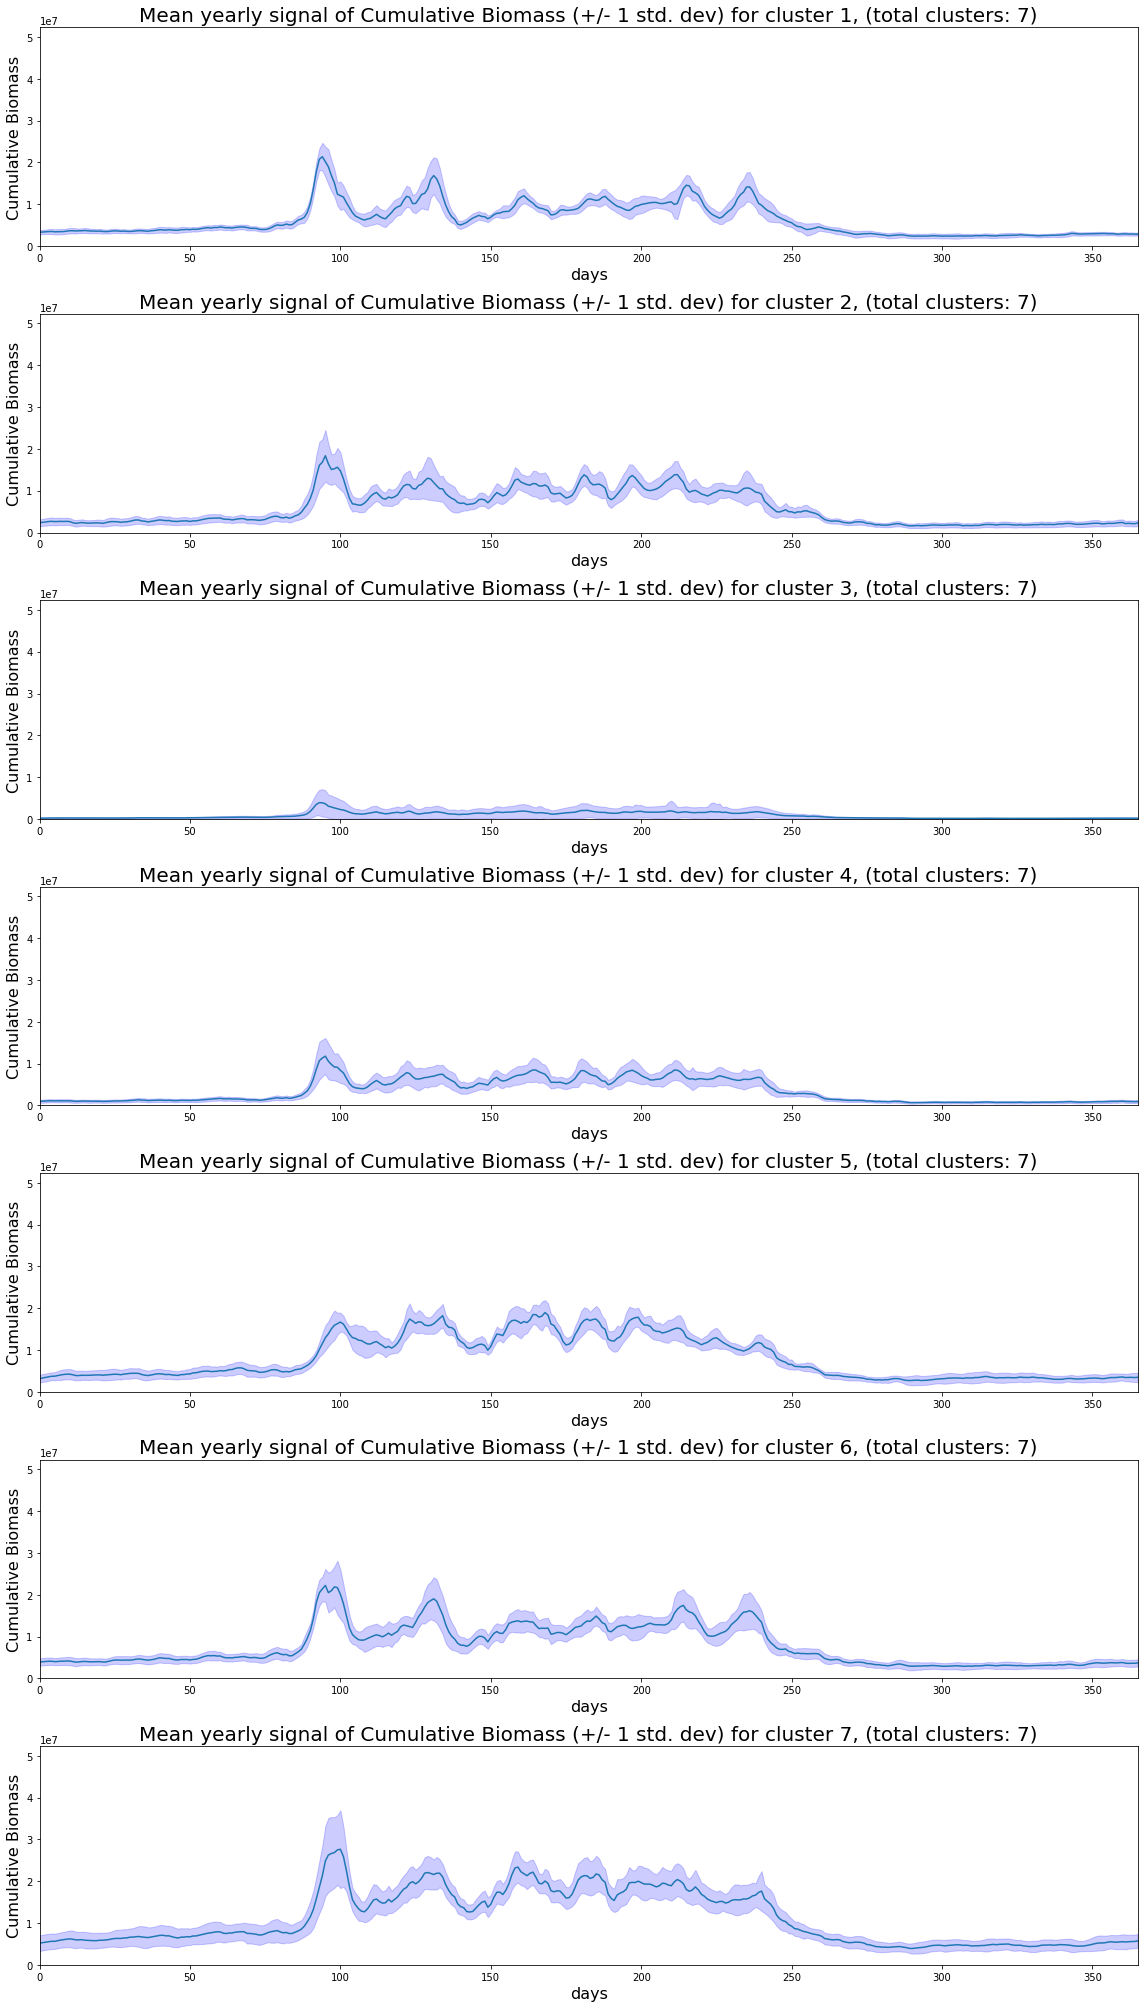

8
8
10


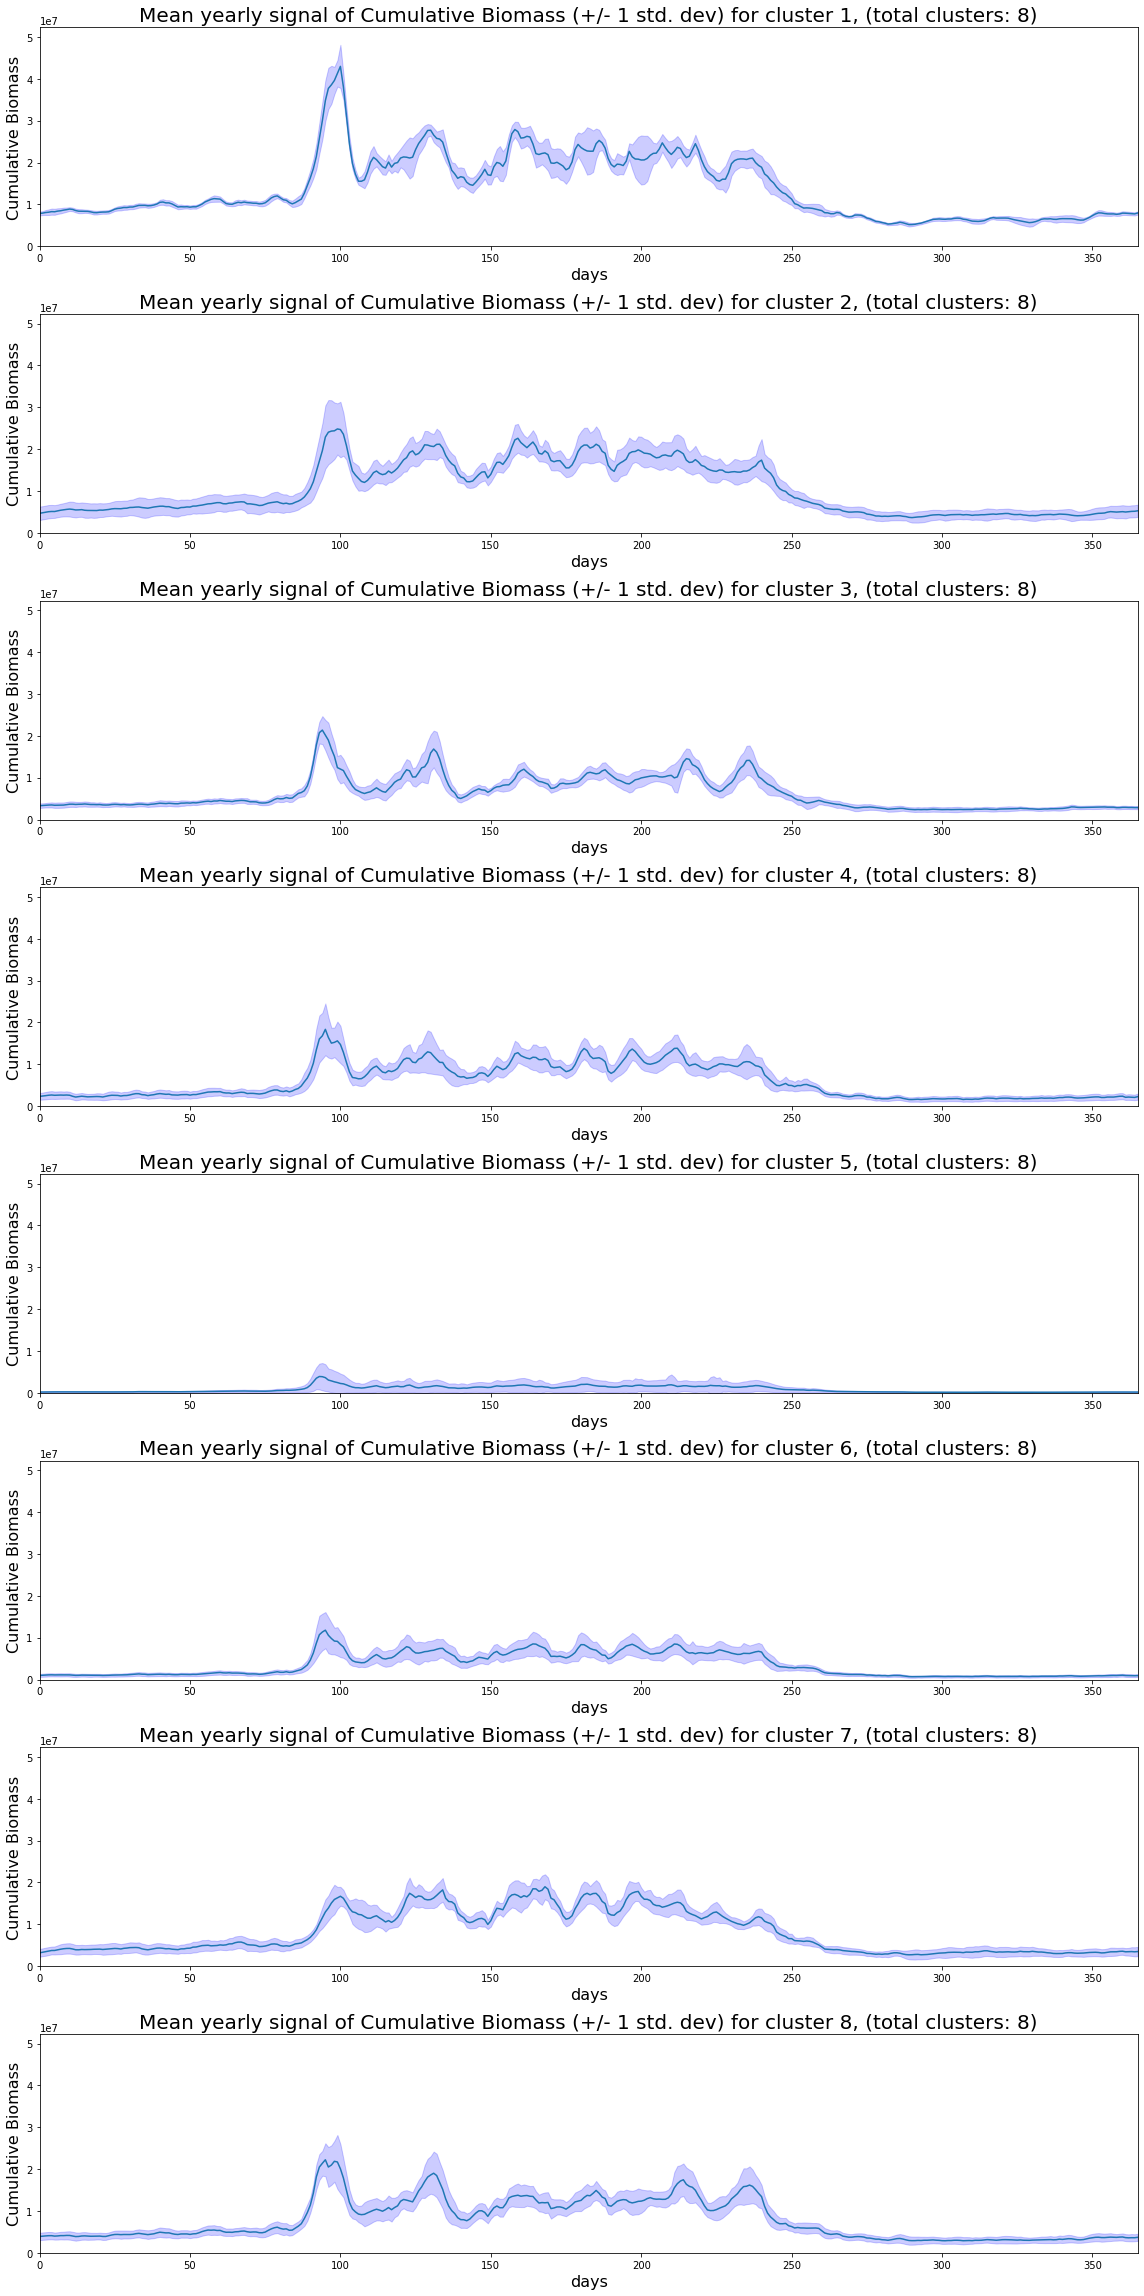

9
9
10


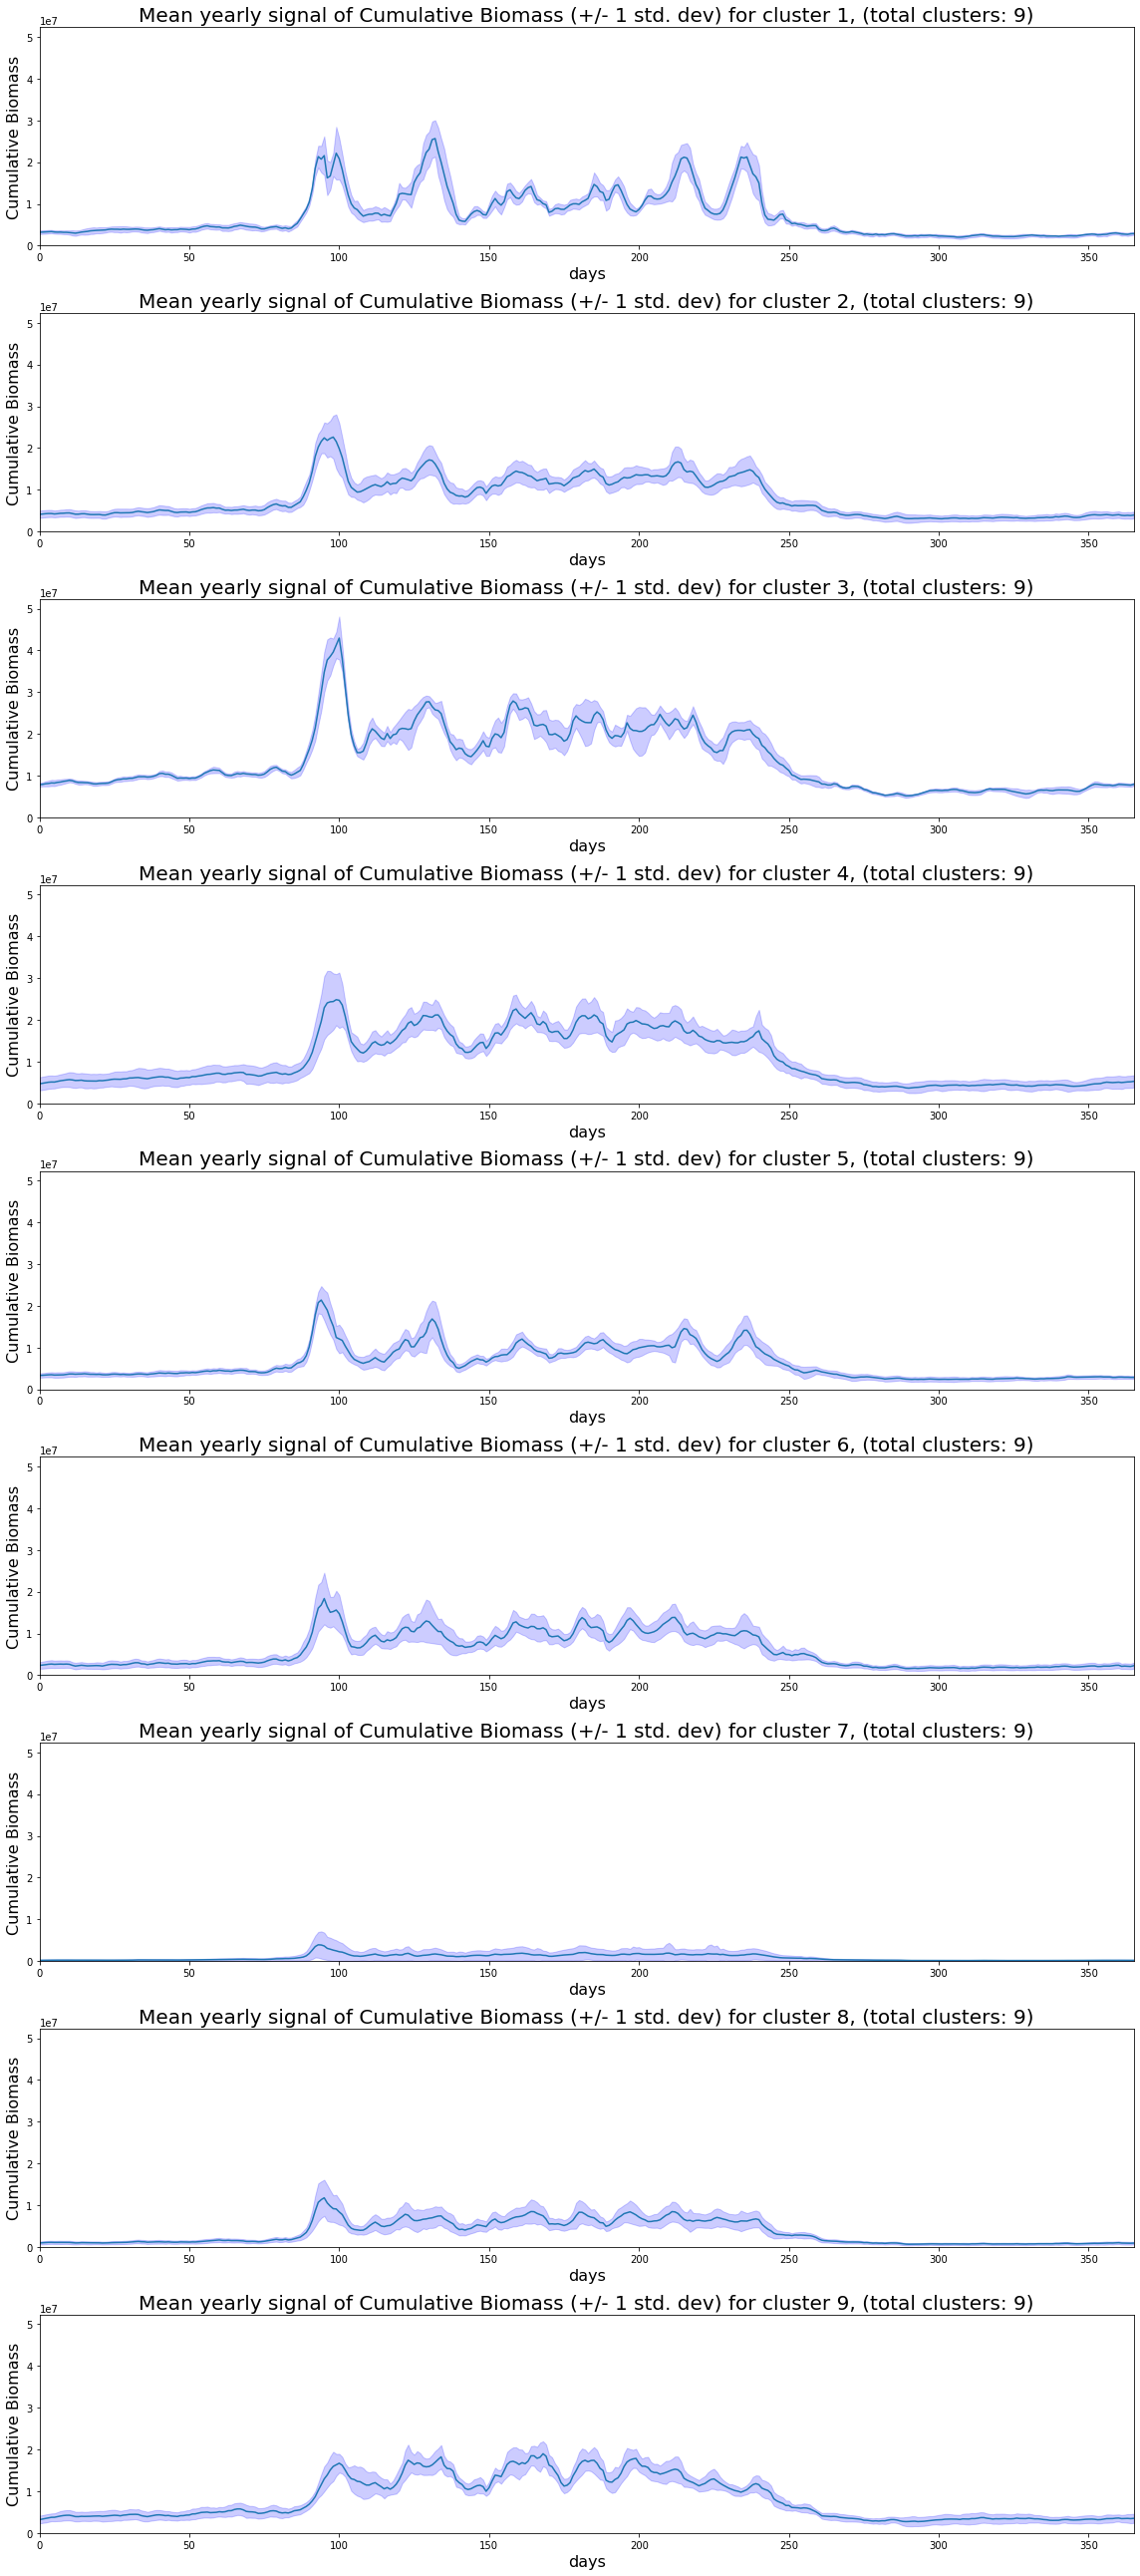

10
10
10


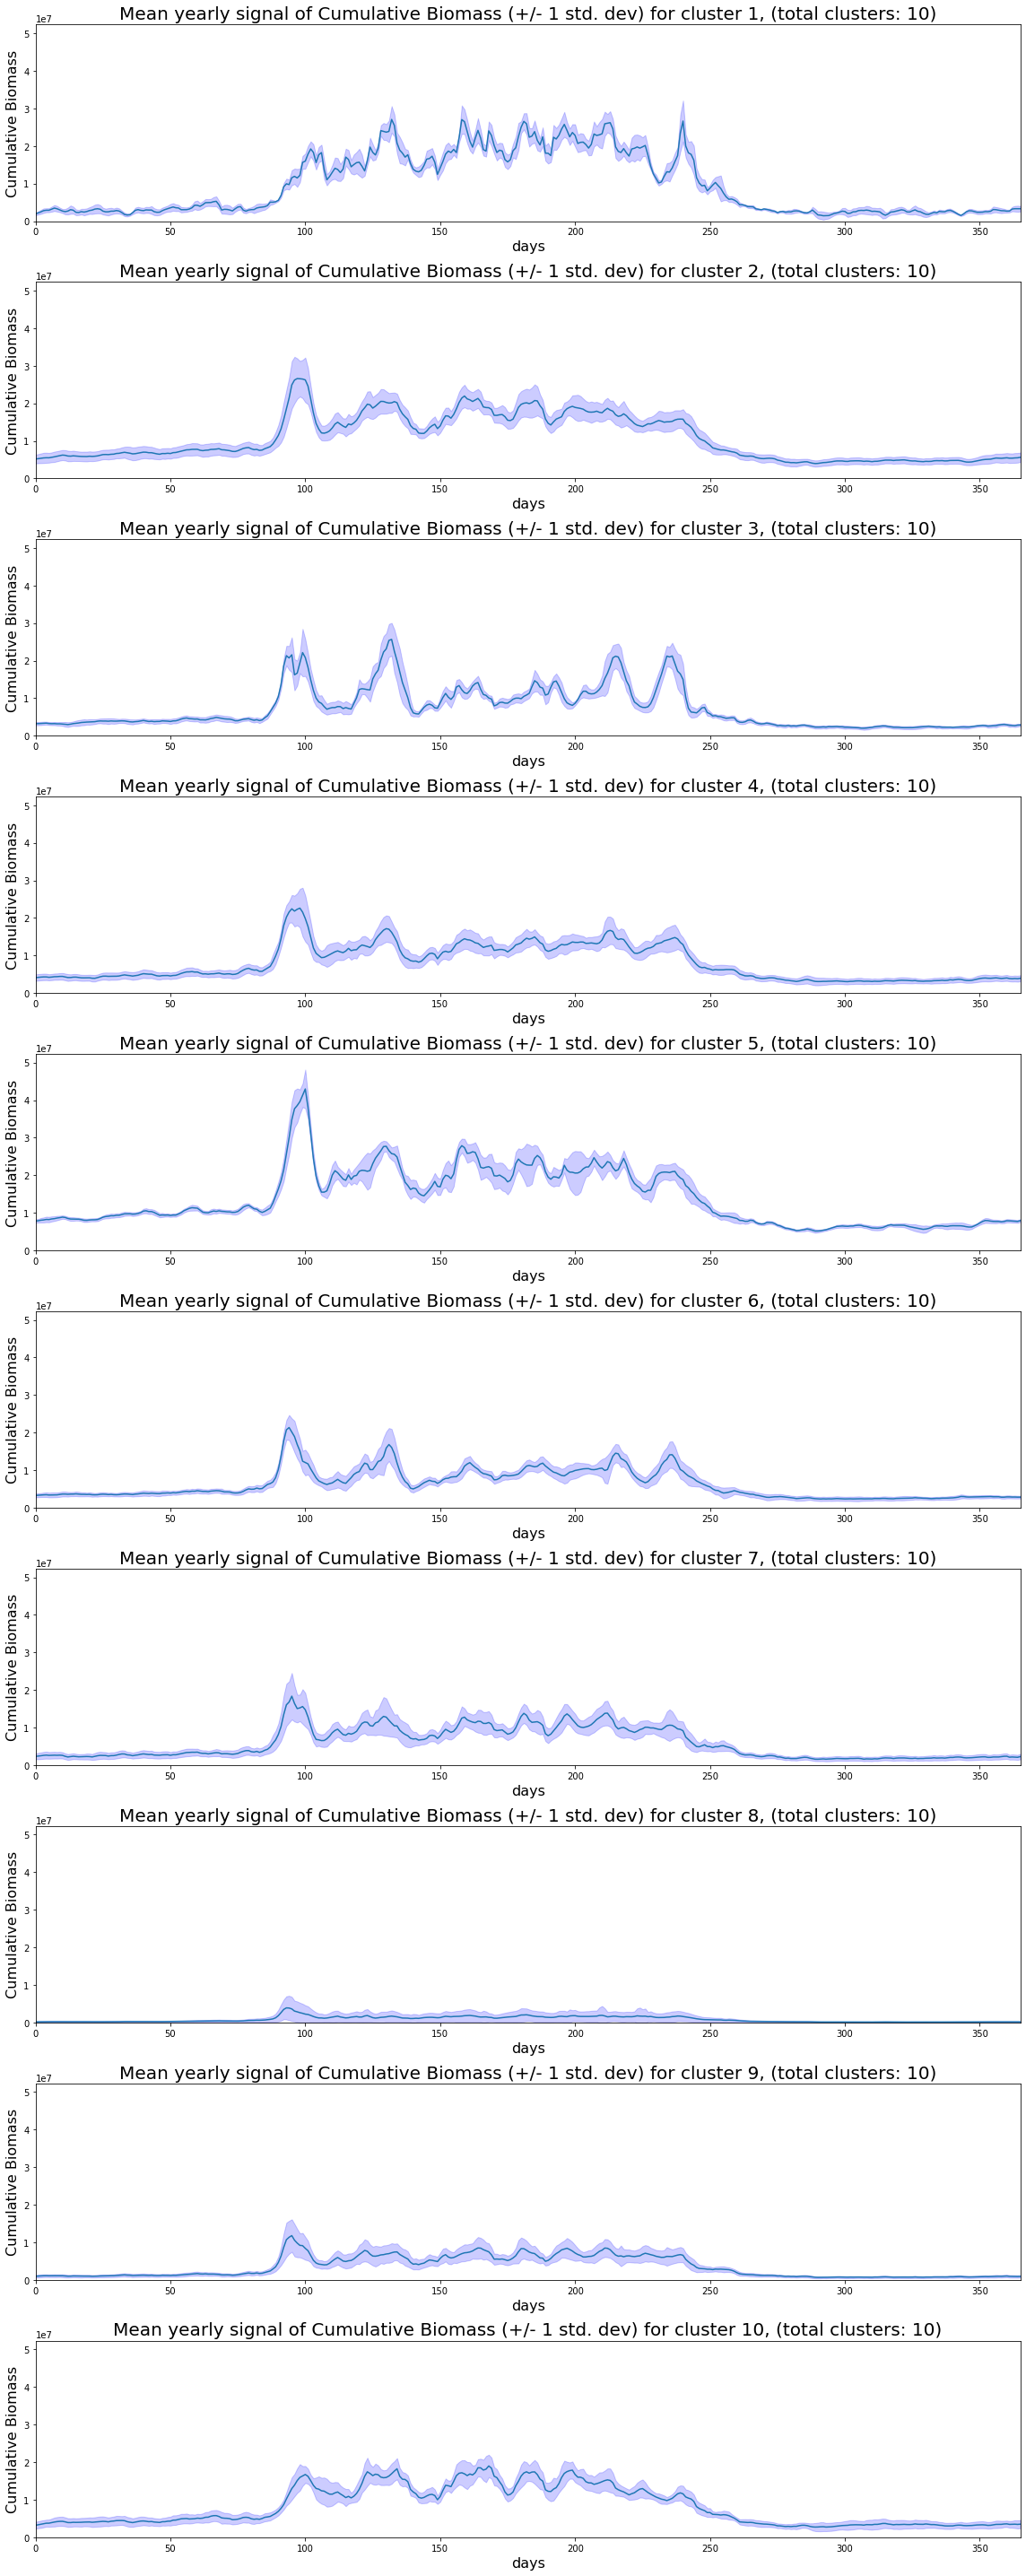

In [12]:
noday = 366
var = 'bio'
year = '2016'

no_cl = [1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15]


fname = './datamats/' + var + '_' + year + 'hind_cl.mat'

### for bio BM 

fname = './datamats/datamats_bio_BM/' + var + '_' + year + 'hind_BM_cl.mat'


ts = 'Freshwater Index'
ylb = 'Freshwater Index'

ts = 'Cumulative Biomass'
ylb = 'Cumulative Biomass'

fdir = './figs/'


#cldir = '/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals_nclust/clmats_c/'

walrus = sio.loadmat(fname)
print(walrus)
fdir = './figs/'

clusters = (walrus['clusters'])
sigmat = (walrus['signalmat'])

# if var == 'bio':
#     sigmat = walrus['datamat_linear']

range_min = 0
range_max = np.max(sigmat) * 1.05
#range_max = 65000000

for i in range(0,len(no_cl)):
    print(no_cl[i])
    #this cluster number
    t_cl = no_cl[i]
    print(t_cl)
    #cluster designation
    cl_des = (clusters[t_cl-1,:])
    cln2 = str(t_cl)
    if len(cln2) ==1:
        cln2 = '0'+cln2
    
    mean_patterns, std_dev_patterns = cf.find_mean_patterns(sigmat,t_cl,cl_des,noday)
    print(max(no_cl))
    #print(mean_patterns)
    fig = plt.figure(figsize=(16,4*t_cl))
    no_clusters = t_cl
    for j in range(1,no_clusters+1):
        
        ax = fig.add_subplot(no_clusters,1,j)
        pattern = mean_patterns[j-1,:]
        st_dev = std_dev_patterns[j-1,:]
        days = np.arange(noday)
        
        ax.plot(days,pattern)
        ax.fill_between(days,pattern+st_dev,pattern-st_dev, color = 'b', alpha = 0.2)

        ax.set_ylim([0,range_max])
        ax.set_xlim([0,365])
        plt.xlabel('days', fontsize=16)
        plt.ylabel(ylb, fontsize=16)
        titstring = 'Mean yearly signal of ' + ts +' (+/- 1 std. dev) for cluster ' + str(j) + ', (total clusters: ' + str(no_clusters) + ')'
        ax.set_title(titstring, fontsize = 20)


    fname = './figs/' + var + '_BM_' + year + 'sig_cl_' + str(cln2) + '.png'
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(fname)

    plt.show()
    

In [ ]:
def signal(ax,var,year,no_of_clust,thisclust,noday,tcol,tline,verbose = False):
    
    fname = './datamats/' + var + '_' + year + 'hind_cl.mat'
    walrus = sio.loadmat(fname)
    clusters = (walrus['clusters'])
    sigmat = (walrus['signalmat'])
    
    #cluster designation
    cl_des = (clusters[no_of_clust-1,:])
    mean_patterns, std_dev_patterns = cf.find_mean_patterns(sigmat,no_of_clust,cl_des,noday)
    t_pat = mean_patterns[thisclust-1,:]
    days = np.size(t_pat)
    dayrange = np.arange(1,days+1,1)
    plt.xlim([0,days])
    ax.plot(dayrange,t_pat, color = tcol, linestyle = tline, linewidth = 2)
    if verbose == True:
        ax.plot(dayrange,t_pat, color = tcol, linestyle = tline, linewidth = 2, label = year)
        plt.legend(loc = 'best')
    return

def signal_bio(ax,var,year,no_of_clust,thisclust,noday,tcol,tline,verbose = False):
    
    fname = './datamats/' + var + '_' + year + 'hind_cl.mat'
    fname2 = './datamats/' + var + '_' + year + 'hind.mat'
 
    walrus = sio.loadmat(fname)
    walrus2 = sio.loadmat(fname2)

    no_cl = [1,2,3,4,5,6,7,8,9,10,11,12]
    clusters = (walrus['clusters'])
    sigmat = (walrus2['datamat'])
    var_to_include = [0,1,2]
    
    cl_des = (clusters[no_of_clust-1,:])
    #noday = 365
    mean_patterns, std_dev_patterns = cf.find_mean_patterns_mv(sigmat,no_of_clust,cl_des,var_to_include, noday)
    #print(np.shape(mean_patterns))
    mean_pat_tot = np.sum(mean_patterns, axis = 2)
    t_pat = mean_pat_tot[thisclust-1,:]
    days = np.size(t_pat)
    dayrange = np.arange(1,days+1,1)
    plt.xlim([0,days])
    ax.plot(dayrange,t_pat, color = tcol, linestyle = tline, linewidth = 2)
    if verbose == True:
        ax.plot(dayrange,t_pat, color = tcol, linestyle = tline, linewidth = 2, label = year)
        plt.legend(loc = 'best')
    return

def signal_diat(ax,var,year,no_of_clust,thisclust,noday,tcol,tline,verbose = False):
    
    fname = './datamats/' + var + '_' + year + 'hind_cl.mat'
    fname2 = './datamats/' + var + '_' + year + 'hind.mat'
 
    walrus = sio.loadmat(fname)
    walrus2 = sio.loadmat(fname2)

    no_cl = [1,2,3,4,5,6,7,8,9,10,11,12]
    clusters = (walrus['clusters'])
    sigmat = (walrus2['datamat'])
    var_to_include = [0,1,2]
    
    cl_des = (clusters[no_of_clust-1,:])
    #noday = 365
    mean_patterns, std_dev_patterns = cf.find_mean_patterns_mv(sigmat,no_of_clust,cl_des,var_to_include, noday)
    #print(np.shape(mean_patterns))
    mean_pat_tot = mean_patterns[:,:,0]
    #print(np.shape(mean_pat_tot))
    t_pat = mean_pat_tot[thisclust-1,:]
    days = np.size(t_pat)
    dayrange = np.arange(1,days+1,1)
    plt.xlim([0,days])
    ax.plot(dayrange,t_pat, color = tcol, linestyle = tline, linewidth = 2)
    if verbose == True:
        ax.plot(dayrange,t_pat, color = tcol, linestyle = tline, linewidth = 2, label = year)
        plt.legend(loc = 'best')
    return

# fact = 1.2
# fig = plt.figure(figsize=(10*fact, 8.3*fact))
# ### fwi 
# ax1 = plt.subplot2grid((3,1),(0,0))
# signal_bio(ax1,'bio','2016',5,1,366,'red',':',verbose = False)


In [ ]:
fact = 1.2
fig = plt.figure(figsize=(10*fact, 8.3*fact))
### fwi 
ax1 = plt.subplot2grid((3,1),(0,0))
#2013
signal(ax1,'fwi','2013',5,4,365,'saddlebrown','-')
signal(ax1,'fwi','2014',5,2,365,'saddlebrown','dotted')
signal(ax1,'fwi','2015',5,2,365,'saddlebrown','dashed')
signal(ax1,'fwi','2016',5,5,366,'saddlebrown','dashdot')

signal(ax1,'fwi','2013',5,5,365,'powderblue','-')
signal(ax1,'fwi','2014',5,3,365,'powderblue','dotted')
signal(ax1,'fwi','2015',5,3,365,'powderblue','dashed')
signal(ax1,'fwi','2016',5,1,366,'powderblue','dashdot')

signal(ax1,'fwi','2013',5,1,365,'dodgerblue','-')
signal(ax1,'fwi','2014',5,4,365,'dodgerblue','dotted')
signal(ax1,'fwi','2015',5,4,365,'dodgerblue','dashed')
signal(ax1,'fwi','2016',5,2,366,'dodgerblue','dashdot')

signal(ax1,'fwi','2013',5,2,365,'blue','-')
signal(ax1,'fwi','2014',5,5,365,'blue','dotted')
signal(ax1,'fwi','2015',5,5,365,'blue','dashed')
signal(ax1,'fwi','2016',5,4,366,'blue','dashdot')
ax1.set_title('Freshwater Index')
### halo 
ax1 = plt.subplot2grid((3,1),(1,0))
signal(ax1,'halo','2013',5,2,365,'saddlebrown','-',True)
signal(ax1,'halo','2014',5,2,365,'saddlebrown','dotted',True)
signal(ax1,'halo','2015',5,4,365,'saddlebrown','dashed',True)
signal(ax1,'halo','2016',5,3,366,'saddlebrown','dashdot',True)

signal(ax1,'halo','2013',5,1,365,'dodgerblue','-')
signal(ax1,'halo','2014',5,1,365,'dodgerblue','dotted')
signal(ax1,'halo','2015',5,3,365,'dodgerblue','dashed')
signal(ax1,'halo','2016',5,4,366,'dodgerblue','dashdot')
ax1.set_title('Halocline Depth')

### bio 
ax1 = plt.subplot2grid((3,1),(2,0))
signal_bio(ax1,'bio','2013',5,1,365,'saddlebrown','-')
signal_bio(ax1,'bio','2014',5,1,365,'saddlebrown','dotted')
signal_bio(ax1,'bio','2015',5,3,365,'saddlebrown','dashed')
signal_bio(ax1,'bio','2016',5,3,366,'saddlebrown','dashdot')

signal_bio(ax1,'bio','2013',5,2,365,'dodgerblue','-')
signal_bio(ax1,'bio','2014',5,2,365,'dodgerblue','dotted')
signal_bio(ax1,'bio','2015',5,2,365,'dodgerblue','dashed')
signal_bio(ax1,'bio','2016',5,1,366,'dodgerblue','dashdot')
ax1.set_title('Sum depth-integrated productivity')

plt.tight_layout()

In [ ]:
fact = 1.2
fig = plt.figure(figsize=(10*fact, 8.3*fact))
### fwi 
ax1 = plt.subplot2grid((3,1),(0,0))
#2013
signal(ax1,'fwi','2013',5,4,365,'saddlebrown','-')
signal(ax1,'fwi','2014',5,2,365,'saddlebrown','dotted')
signal(ax1,'fwi','2015',5,2,365,'saddlebrown','dashed')
signal(ax1,'fwi','2016',5,5,366,'saddlebrown','dashdot')

signal(ax1,'fwi','2013',5,5,365,'powderblue','-')
signal(ax1,'fwi','2014',5,3,365,'powderblue','dotted')
signal(ax1,'fwi','2015',5,3,365,'powderblue','dashed')
signal(ax1,'fwi','2016',5,1,366,'powderblue','dashdot')

signal(ax1,'fwi','2013',5,1,365,'dodgerblue','-')
signal(ax1,'fwi','2014',5,4,365,'dodgerblue','dotted')
signal(ax1,'fwi','2015',5,4,365,'dodgerblue','dashed')
signal(ax1,'fwi','2016',5,2,366,'dodgerblue','dashdot')

signal(ax1,'fwi','2013',5,2,365,'blue','-')
signal(ax1,'fwi','2014',5,5,365,'blue','dotted')
signal(ax1,'fwi','2015',5,5,365,'blue','dashed')
signal(ax1,'fwi','2016',5,4,366,'blue','dashdot')
ax1.set_title('Freshwater Index')
### halo 
ax1 = plt.subplot2grid((3,1),(1,0))
signal(ax1,'halo','2013',5,2,365,'saddlebrown','-',True)
signal(ax1,'halo','2014',5,2,365,'saddlebrown','dotted',True)
signal(ax1,'halo','2015',5,4,365,'saddlebrown','dashed',True)
signal(ax1,'halo','2016',5,3,366,'saddlebrown','dashdot',True)

signal(ax1,'halo','2013',5,1,365,'dodgerblue','-')
signal(ax1,'halo','2014',5,1,365,'dodgerblue','dotted')
signal(ax1,'halo','2015',5,3,365,'dodgerblue','dashed')
signal(ax1,'halo','2016',5,4,366,'dodgerblue','dashdot')
ax1.set_title('Halocline Depth')

### bio 
ax1 = plt.subplot2grid((3,1),(2,0))
signal_diat(ax1,'bio','2013',5,1,365,'saddlebrown','-')
signal_diat(ax1,'bio','2014',5,1,365,'saddlebrown','dotted')
signal_diat(ax1,'bio','2015',5,3,365,'saddlebrown','dashed')
signal_diat(ax1,'bio','2016',5,3,366,'saddlebrown','dashdot')

signal_diat(ax1,'bio','2013',5,2,365,'dodgerblue','-')
signal_diat(ax1,'bio','2014',5,2,365,'dodgerblue','dotted')
signal_diat(ax1,'bio','2015',5,2,365,'dodgerblue','dashed')
signal_diat(ax1,'bio','2016',5,1,366,'dodgerblue','dashdot')
ax1.set_title('Sum depth-integrated diatoms')

plt.tight_layout()

## productivity signals

In [ ]:
fact = 1.2
fig = plt.figure(figsize=(10*fact, 8.3*fact))
### fwi 
ax1 = plt.subplot2grid((4,1),(0,0))
signal_bio(ax1,'bio','2013',5,1,365,'saddlebrown','-',True)
signal_bio(ax1,'bio','2013',5,2,365,'dodgerblue','-',True)

ax1 = plt.subplot2grid((4,1),(1,0))
signal_bio(ax1,'bio','2014',5,1,365,'saddlebrown','dotted',True)
signal_bio(ax1,'bio','2014',5,2,365,'dodgerblue','dotted',True)

ax1 = plt.subplot2grid((4,1),(2,0))
signal_bio(ax1,'bio','2015',5,3,365,'saddlebrown','dashed',True)
signal_bio(ax1,'bio','2015',5,2,365,'dodgerblue','dashed',True)

ax1 = plt.subplot2grid((4,1),(3,0))
signal_bio(ax1,'bio','2016',5,3,366,'saddlebrown','dashdot',True)
signal_bio(ax1,'bio','2016',5,1,366,'dodgerblue','dashdot',True)
#2013

plt.suptitle('North-south divide in productivity signals, 201905, yrs 2013-2016')



In [ ]:
fact = 1.2
fig = plt.figure(figsize=(10*fact, 8.3*fact))
### fwi 
ax1 = plt.subplot2grid((4,1),(0,0))
signal_diat(ax1,'bio','2013',5,1,365,'saddlebrown','-',True)
signal_diat(ax1,'bio','2013',5,2,365,'dodgerblue','-',True)

ax1 = plt.subplot2grid((4,1),(1,0))
signal_diat(ax1,'bio','2014',5,1,365,'saddlebrown','dotted',True)
signal_diat(ax1,'bio','2014',5,2,365,'dodgerblue','dotted',True)

ax1 = plt.subplot2grid((4,1),(2,0))
signal_diat(ax1,'bio','2015',5,3,365,'saddlebrown','dashed',True)
signal_diat(ax1,'bio','2015',5,2,365,'dodgerblue','dashed',True)

ax1 = plt.subplot2grid((4,1),(3,0))
signal_diat(ax1,'bio','2016',5,3,366,'saddlebrown','dashdot',True)
signal_diat(ax1,'bio','2016',5,1,366,'dodgerblue','dashdot',True)
#2013

plt.suptitle('North-south divide in diatom signals, 201905, yrs 2013-2016')

